<h1 align = "center" > House Price Prediction using TensorFlow </h1>

## Project Content

1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables In Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The Dataset](#7)
    * 2.3 [Initial analysis on the dataset](#8)
3. [Exploratory Data Analysis](#9)
    * 3.1 [Examining Missing Values](#10)
    * 3.2 [Examining Unique Values](#11)
    * 3.3 [Uni-variate Analysis](#12)
        - 3.3.1 [Analysis with Histogram](#13)
    * 3.4 [Bi-variate Analysis](#14)
        - 3.4.1 [Variables - Target Analysis with Scatter Plor](#15)
        - 3.4.2 [Relationship Between Variables Analysis with Heatmap](#16)
4. [Preparation for Modelling](#17)
    * 4.1 [Looking for outliers](#18)
    * 4.2 [Feature Scaling with the RobustScaler Method for Machine Learning Algorithms](#19)
    * 4.3 [Separating Data into Test and Training Set](#20)
5. [Evaluating Different Regression Models](#21)
    * 5.1 [Lineal Regression](#22)
        - 5.1.1 [Cross Validation](#23)
    * 5.2 [Decision Tree](#24)
        - 5.2.1 [Cross Validation](#25)
        - 5.2.2 [Hyperparameters Evaluation](#26)
    * 5.3 [Random Forest](#27)
        - 5.3.1 [Cross Validation](#28)
        - 5.3.2 [Hyperparameters Evaluation](#29)
6. [Prediction](#30)
7. [Neural Network](#31)
    * 7.1 [Creating the Model](#32)
    * 7.2 [Model Training](#33)
    * 7.3 [Model Evaluation](#34)
8. [Prediction](#35)
9. [Conclusions](#36)



## 1. Introduction<a id = 1 ></a>

### 1.1 Examining the Project Topic<a id = 2 ></a>

In this project we are looking to solve a regression problem with the help of a **lineal regression", *decision tree**, **random forest** and **neural network** models. In this regression task, we will train the neural network to predict a continuous value, given a set of input features.

### 1.2 Recognizing Variables in Dataset<a id = 3 ></a>

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

## 2. First Organization<a id = 4 ></a>

### 2.1 Required Python Libraries<a id = 5 ></a>

#### 2.1.1 Basic Libraries<a id = 6 ></a>

In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2

%matplotlib inline

print('Libraries imported.')

Libraries imported.


### 2.2 Loading The Dataset<a id = 7 ></a>

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [3]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv("/content/data.csv", names = column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


### 2.3 Inital Analysis of the DataSet<a id = 8 ></a>

In [4]:
data_shape = df.shape
data_shape

(5000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   serial     5000 non-null   int64
 1   date       5000 non-null   int64
 2   age        5000 non-null   int64
 3   distance   5000 non-null   int64
 4   stores     5000 non-null   int64
 5   latitude   5000 non-null   int64
 6   longitude  5000 non-null   int64
 7   price      5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


The dataset contains 5000 rows and 8 columns. In a first initial exploration:

1. It seems that there are no missing values in any of the columns.
2. The dataset seems to be relatively clean at first glance.

In [6]:
data_stats = df.describe()
data_stats

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


Summary of the descriptive statistics for each feature:

- **serial**: Identifier ranging from 1 to 4999.
- **date**: The data ranges from the year 2000 to 2018.
- **age**: Age varies from 0 to 38 years.
- **distance**: The distance values range from 0 to 10.
- **stores**: The number of stores ranges from 0 to 10.
- **latitude**: Latitude values lie between 80 and 90.
- **longitude**: Longitude values are between 120 and 130.
- **price**: The price values range from 11,263 to 16,964.

The dataset seems to be relatively uniform, with no extreme outliers in the described features.

## 3. Exploratory Data Analysis<a id = 9 ></a>

### 3.1: Examining Missing Values<a id = 10 ></a>

We already observed that there are not missing values. But, let's double-check with the isna and isnull methods.

In [7]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [8]:
df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

### 3.1: Examining Unique Values<a id = 11 ></a>

In [9]:
unique_values = df.nunique()
unique_values

serial       5000
date           19
age            39
distance       11
stores         11
latitude       11
longitude      11
price        2806
dtype: int64

- **serial**: 4,999 unique values, which is expected since it's an identifier.
- **date**: 19 unique values, representing different years.
- **age**: 39 unique age values.
- **distance**: 11 unique values, likely ranging from 0 to 10.
- **stores**: 11 unique values, again likely ranging from 0 to 10.
- **latitude**: 11 unique values.
- **longitude**: 11 unique values.
- **price**: 2,806 unique price values.

### 3.3 Uni-Variate Analysis<a id = 12 ></a>

#### 3.3.1 Analysis with Histogram<a id = 13 ></a>

In [10]:
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [11]:
features = ['date', 'age', 'distance', 'stores', 'latitude', 'longitude']

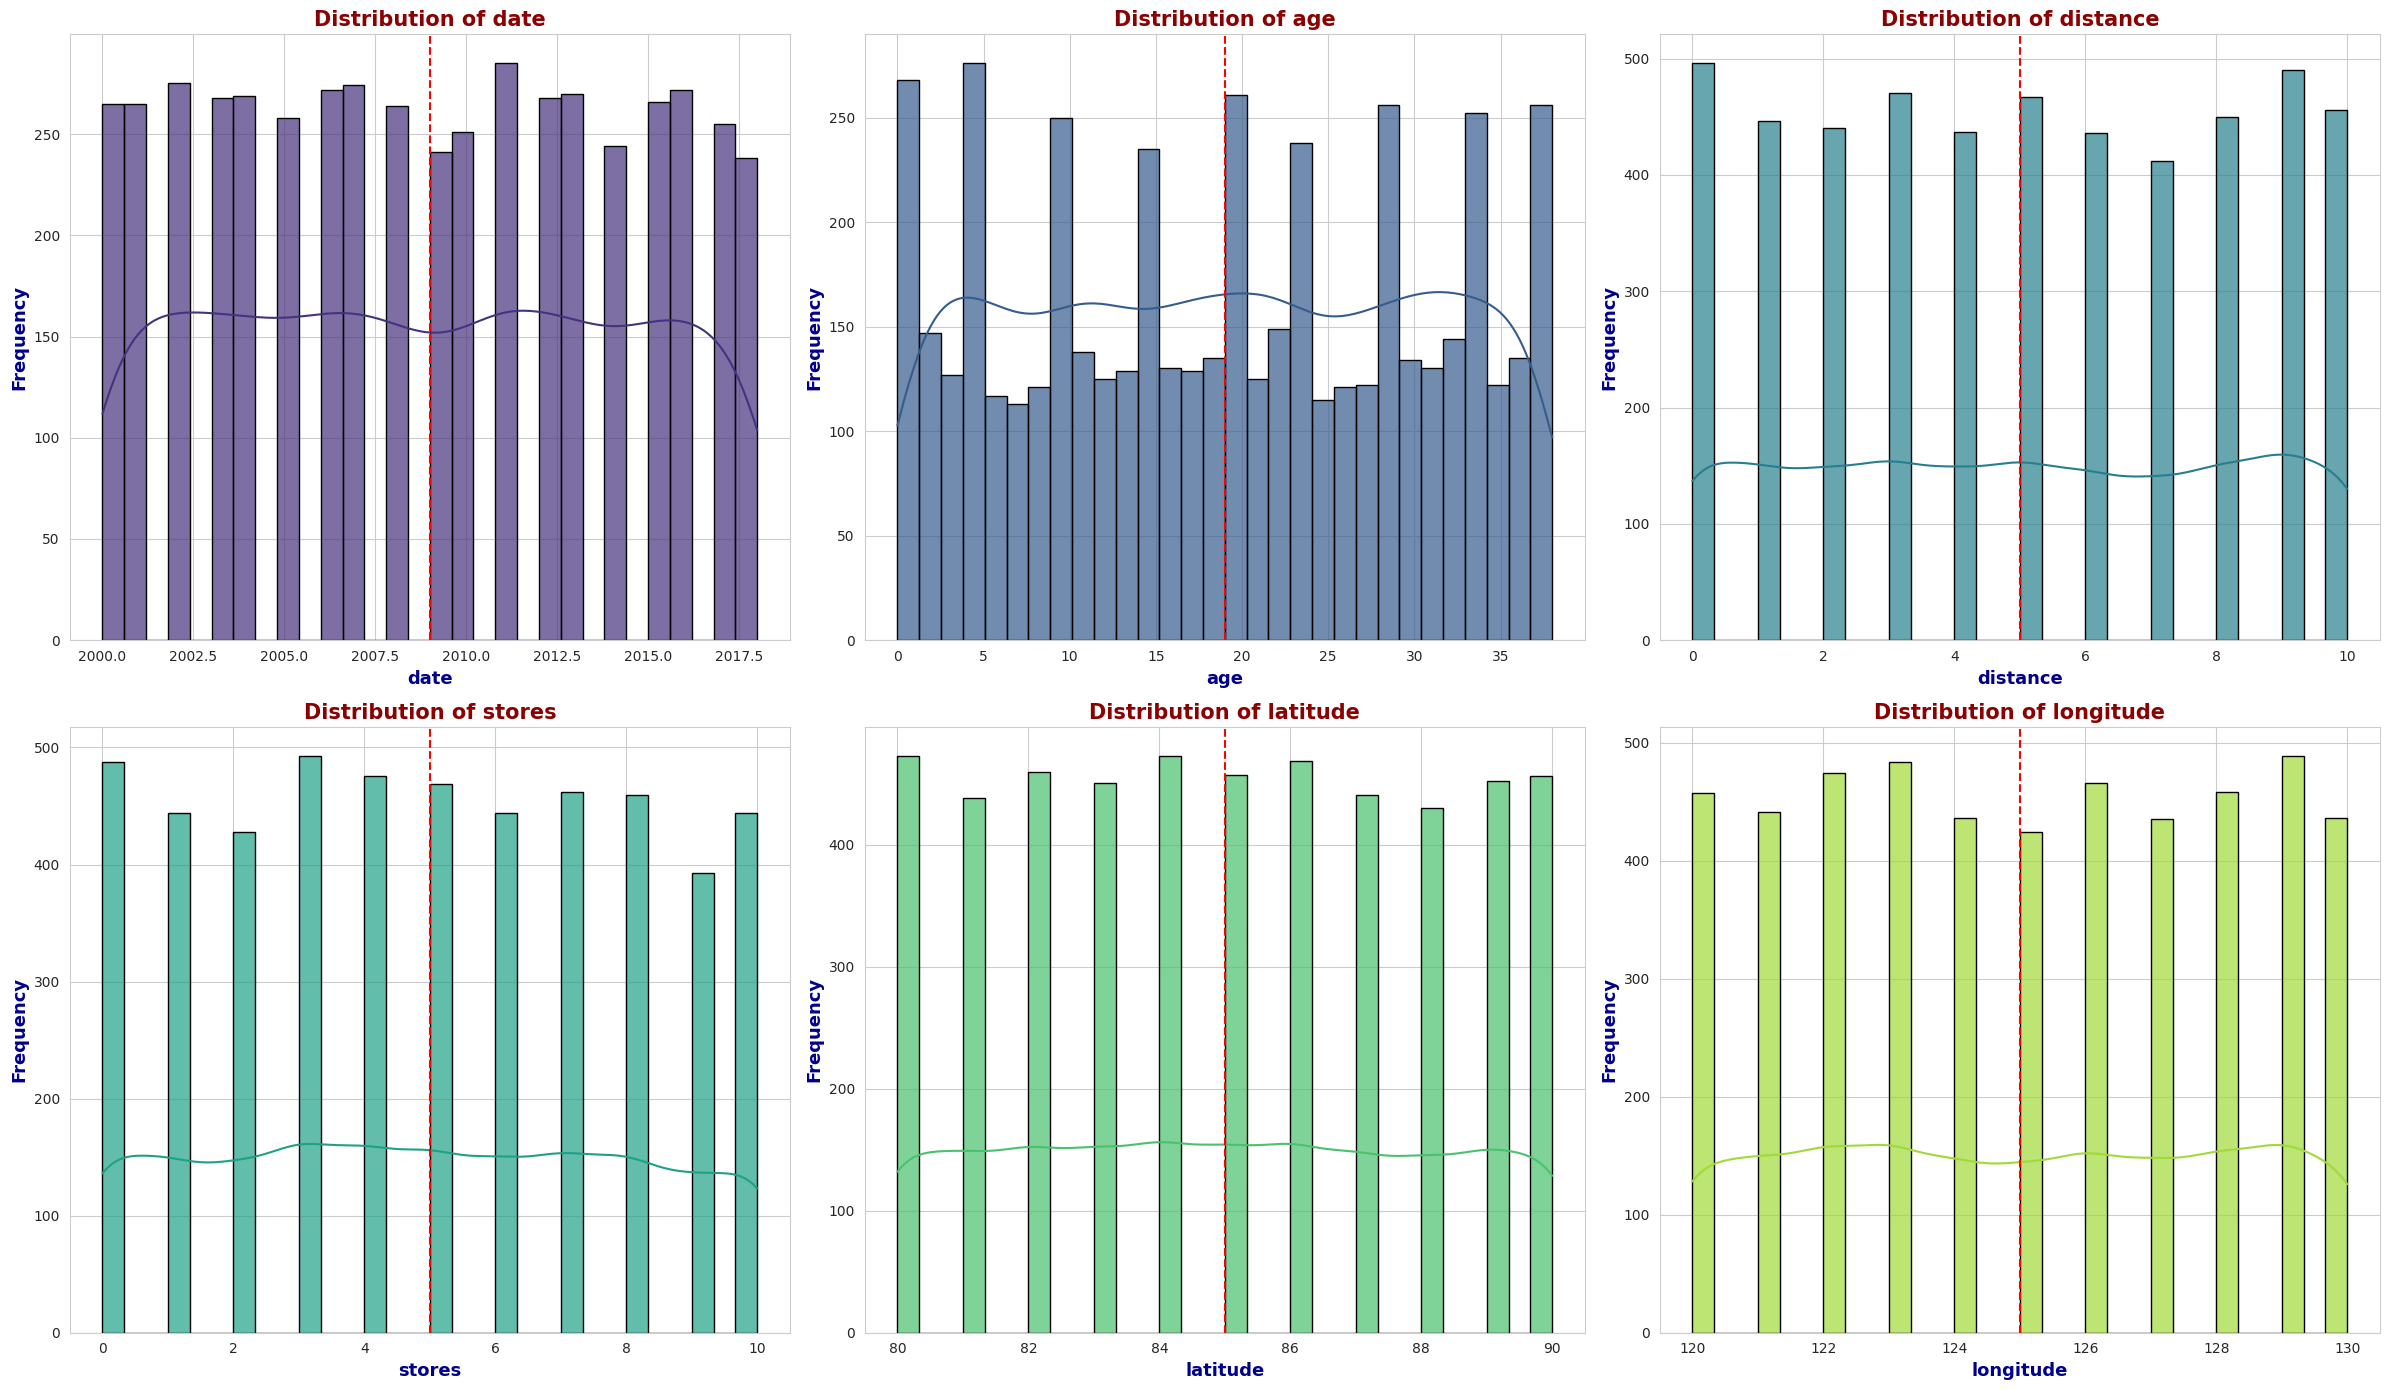

In [12]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 13}

# Custom color palette
palette = sns.color_palette("viridis", len(features))

# Setting up the visual style
sns.set_style("whitegrid")

# Setting up the figure size
plt.figure(figsize=(24, 14))

# Creating histograms for each key feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)

    # Using a distinct color from the palette
    sns.histplot(df[feature], bins=30, kde=True, color=palette[i-1], edgecolor="black", alpha=0.7)

    # Adding a vertical line for the median
    plt.axvline(df[feature].median(), color='red', linestyle='dashed', linewidth=1.5)

    # Title and axis labels with enhanced font
    plt.title(f'Distribution of {feature}', fontdict=title_font)
    plt.xlabel(feature, fontdict=axis_font)
    plt.ylabel("Frequency", fontdict=axis_font)

# Adjusting layout
plt.tight_layout()
plt.show()


- **date**: There's a relatively uniform distribution across the years, with slight peaks around 2004 and 2015.
- **age**: The distribution is almost uniform, with a small decline in the higher age values.
- **distance**: The distribution is somewhat uniform, but there are noticeable peaks at the extremes (0 and 10).
- **stores**: We see a relatively uniform distribution with minor peaks at values 0, 5, and 10.
- **latitude**: The distribution is slightly left-skewed, with a peak around 82.
- **longitude**: The distribution is somewhat uniform, with a minor peak around 125.

### 3.4 Bi-Variate Analysis<a id = 14 ></a>

#### 3.4.1 Variables - Target Analysis with Scatter Plot<a id = 15 ></a>

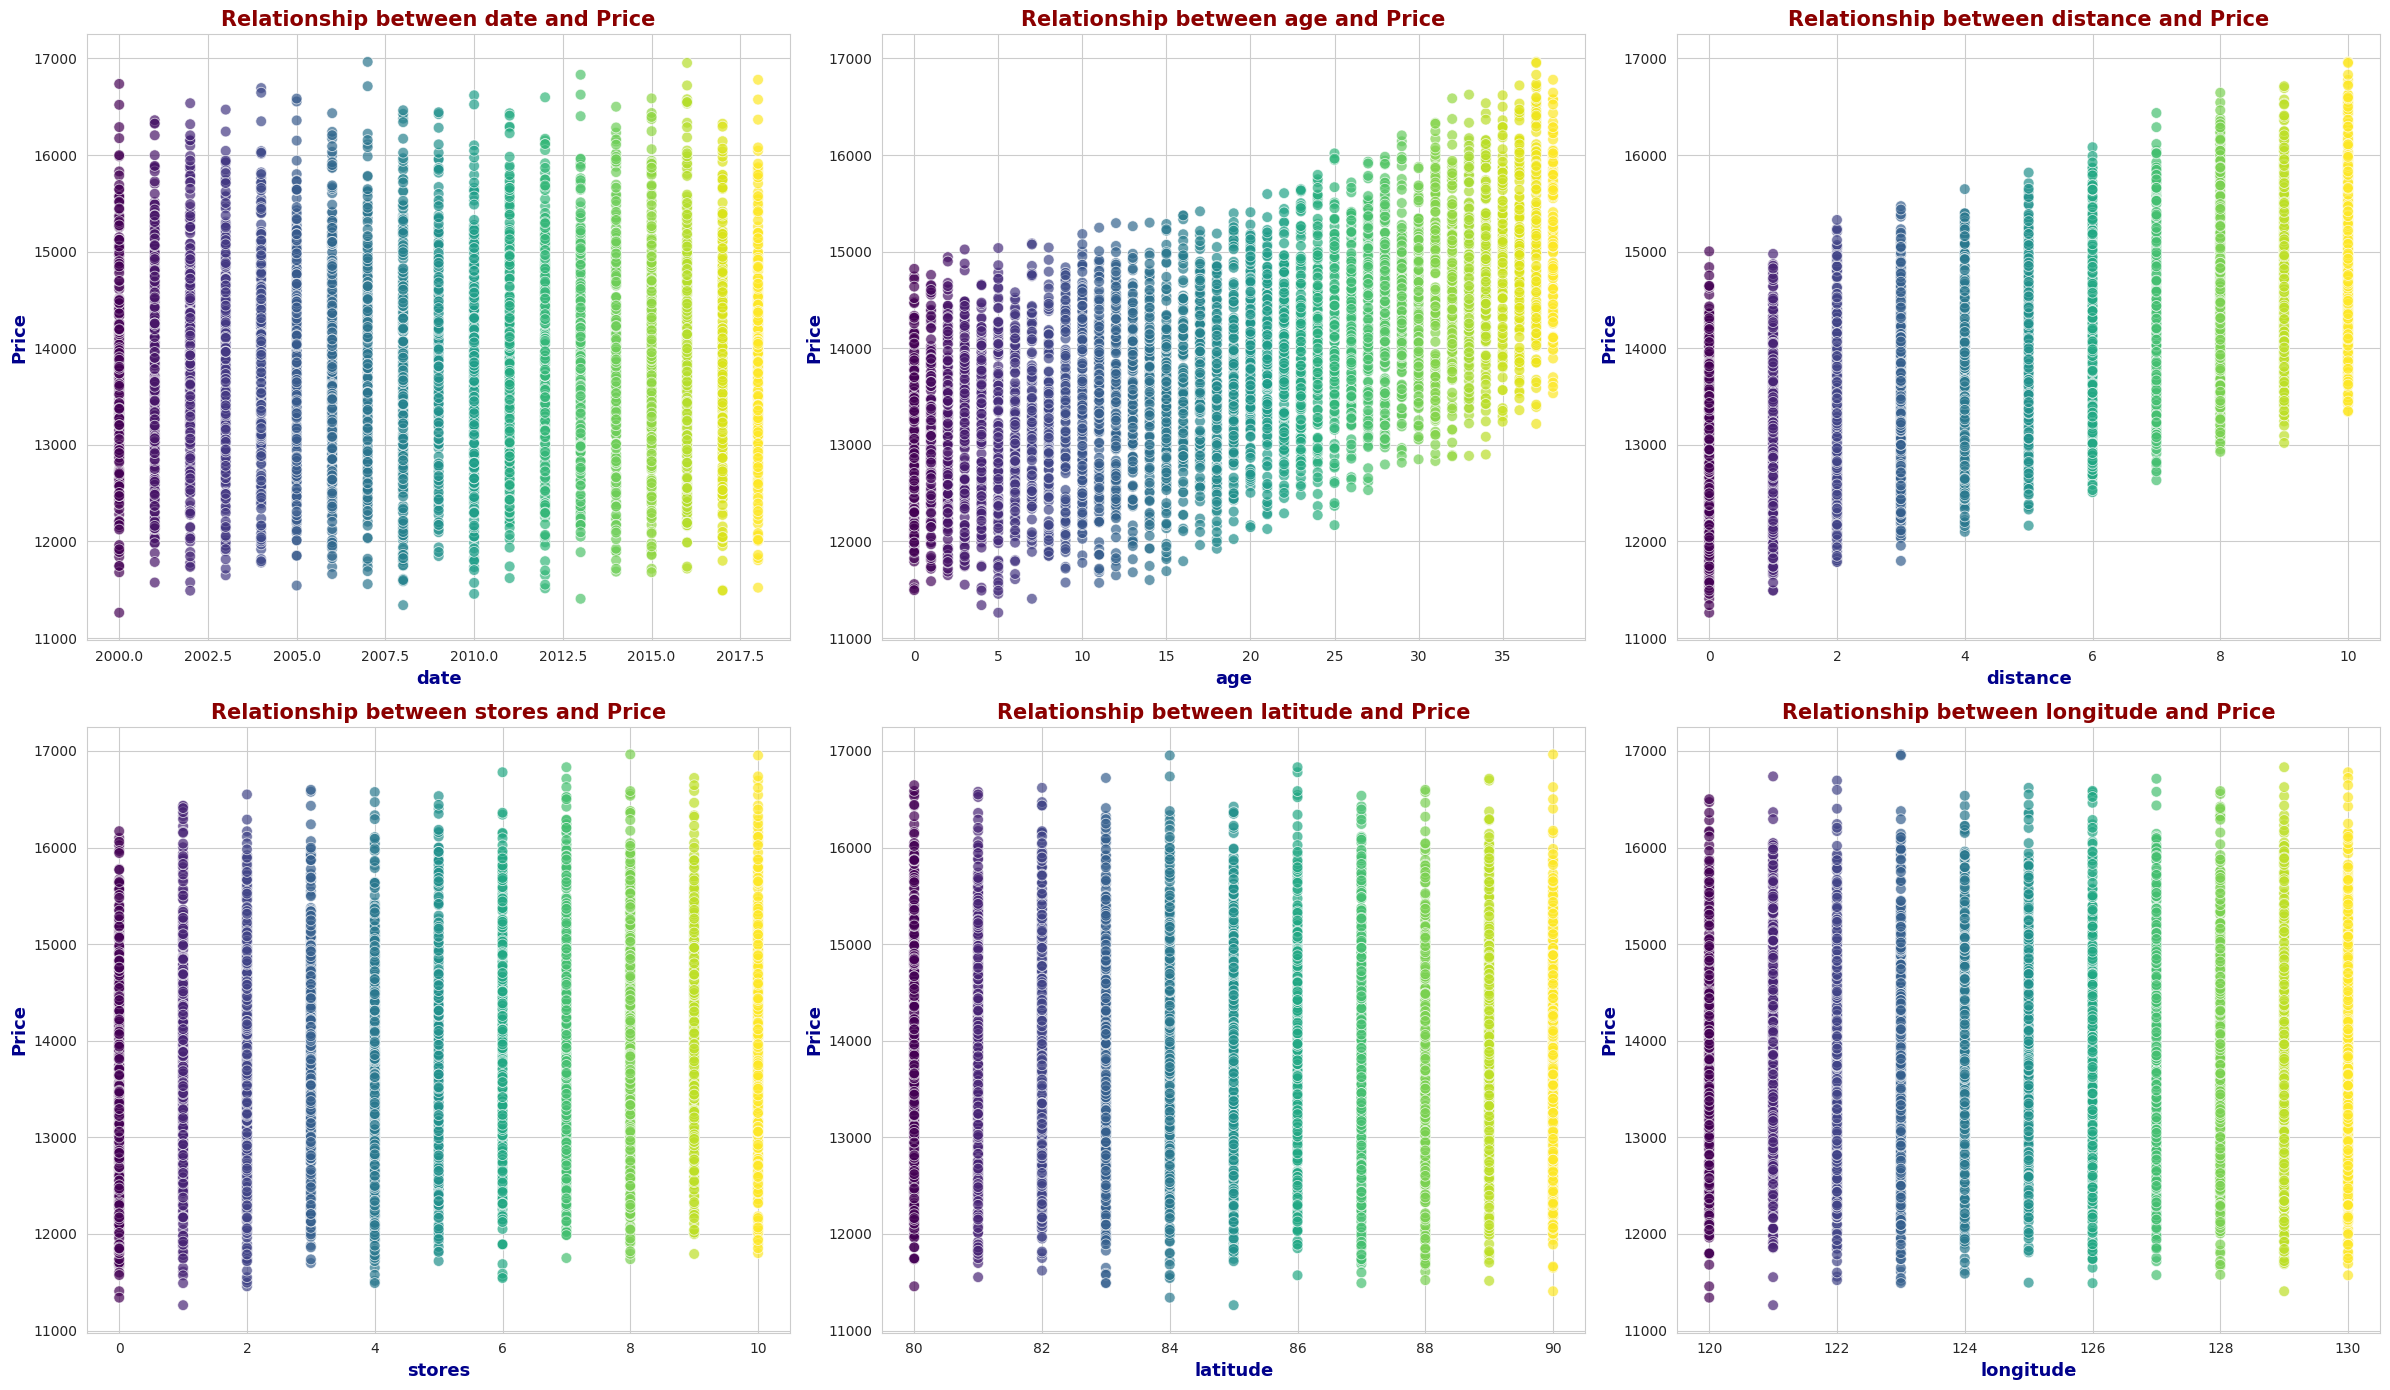

In [13]:
# Setting up the figure size
plt.figure(figsize=(24, 14))

# Creating scatter plots for each feature against the price with enhanced aesthetics
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)

    # Using a continuous color scale
    sns.scatterplot(x=df[feature], y=df['price'], hue=df[feature], palette="viridis", s=60, edgecolor='w', alpha=0.7)

    # Title and axis labels with enhanced font
    plt.title(f'Relationship between {feature} and Price', fontdict=title_font)
    plt.xlabel(feature, fontdict=axis_font)
    plt.ylabel('Price', fontdict=axis_font)

    # Adjusting the legend for clarity
    plt.legend().set_visible(False)

# Adjusting layout
plt.tight_layout()
plt.show()

- **date**: There doesn't seem to be a strong linear relationship between the year and price, but we can observe a slight upward trend, indicating that more recent years might have slightly higher prices.
- **age**: There's a clear positive correlation between age and price, indicating that as age increases, the price tends to increase.
- **distance**: There's a clar positive correlation between distance and price from this plot. This means that when the distance from the city center increases the price of the house increases as well.
- **stores**: There's a slight upward trend, suggesting that more stores in proximity might lead to higher prices.
- **latitude & longitude**: The relationship isn't very clear with these features. There might be a slight trend, but it's not as pronounced as with other features.

#### 3.4.2 Relationship Between Variables Analysis with Heatmap<a id = 16 ></a>

In [14]:
correlation = df.corr()
correlation

,serial,date,age,distance,stores,latitude,longitude,price
serial,1.000000,0.009788,0.028695,0.001985,-0.008224,-0.013213,0.002564,0.024383
date,0.009788,1.000000,-0.015108,0.023578,-0.007395,0.001455,-0.001765,0.036171
age,0.028695,-0.015108,1.000000,-0.010661,0.005447,0.007539,0.022218,0.616318
distance,0.001985,0.023578,-0.010661,1.000000,0.000270,-0.000854,-0.021364,0.651004
stores,-0.008224,-0.007395,0.005447,0.000270,1.000000,0.005351,0.005737,0.158329
latitude,-0.013213,0.001455,0.007539,-0.000854,0.005351,1.000000,-0.009402,0.010986
longitude,0.002564,-0.001765,0.022218,-0.021364,0.005737,-0.009402,1.000000,0.020915
price,0.024383,0.036171,0.616318,0.651004,0.158329,0.010986,0.020915,1.000000


In [15]:
sorted_correlation = correlation['price'].sort_values(ascending = False)
sorted_correlation = sorted_correlation.drop('serial')
sorted_correlation

price        1.000000
distance     0.651004
age          0.616318
stores       0.158329
date         0.036171
longitude    0.020915
latitude     0.010986
Name: price, dtype: float64

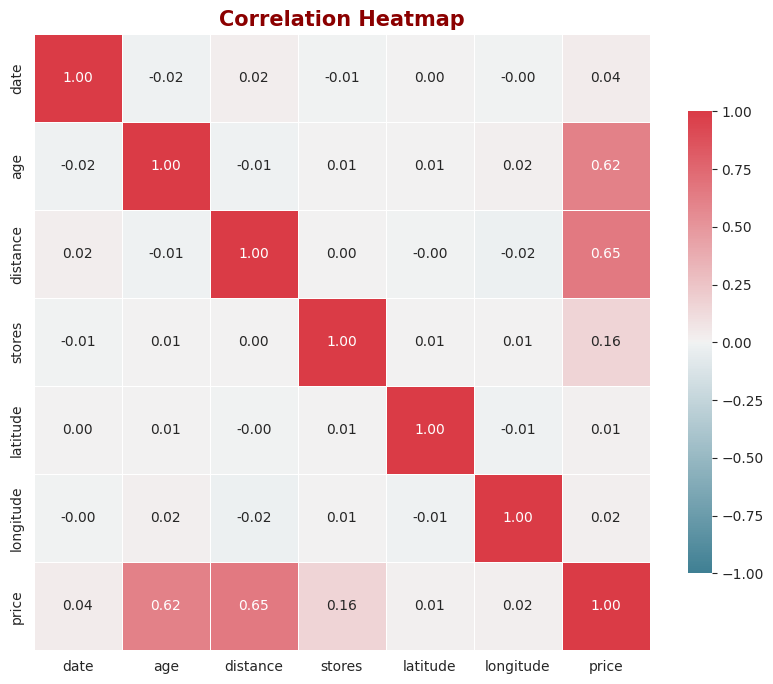

In [16]:
# Compute the correlation matrix
corr_matrix = df.drop('serial', axis=1).corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Drawing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .75})

# Title
plt.title("Correlation Heatmap", fontdict=title_font)
plt.show()

#### Correlation Analysis:

1. **date**:
    - **Correlation with Price**: `0.0362`
    - There's a weak positive correlation between the date and the price. This suggests that, over the years, there might be a slight trend of increasing prices, but the effect is not very strong.

2. **age**:
    - **Correlation with Price**: `0.6163`
    - There's a strong positive correlation between the age of the property and its price. This is somewhat counterintuitive, as we might expect older properties to have lower prices. However, other factors such as historical value, architectural significance, or location in established neighborhoods might contribute to higher prices for older properties.

3. **distance**:
    - **Correlation with Price**: `0.6510`
    - Distance has a strong positive correlation with price. This might suggest that properties further away from the city center tend to have higher prices.

4. **stores**:
    - **Correlation with Price**: `0.1583`
    - There's a moderate positive correlation between the number of stores nearby and the property price. This indicates that properties with more stores in proximity tend to have higher prices.

5. **latitude** & **longitude**:
    - **Correlations with Price**: `0.0110` & `0.0210`
    - Both latitude and longitude show very weak correlations with price. This suggests that in the dataset's geographical scope, there isn't a strong north-south or east-west trend in property prices.


## 4. Preparation for Modelling<a id = 17 ></a>

### 4.1 Looking for outliers<a id = 18 ></a>

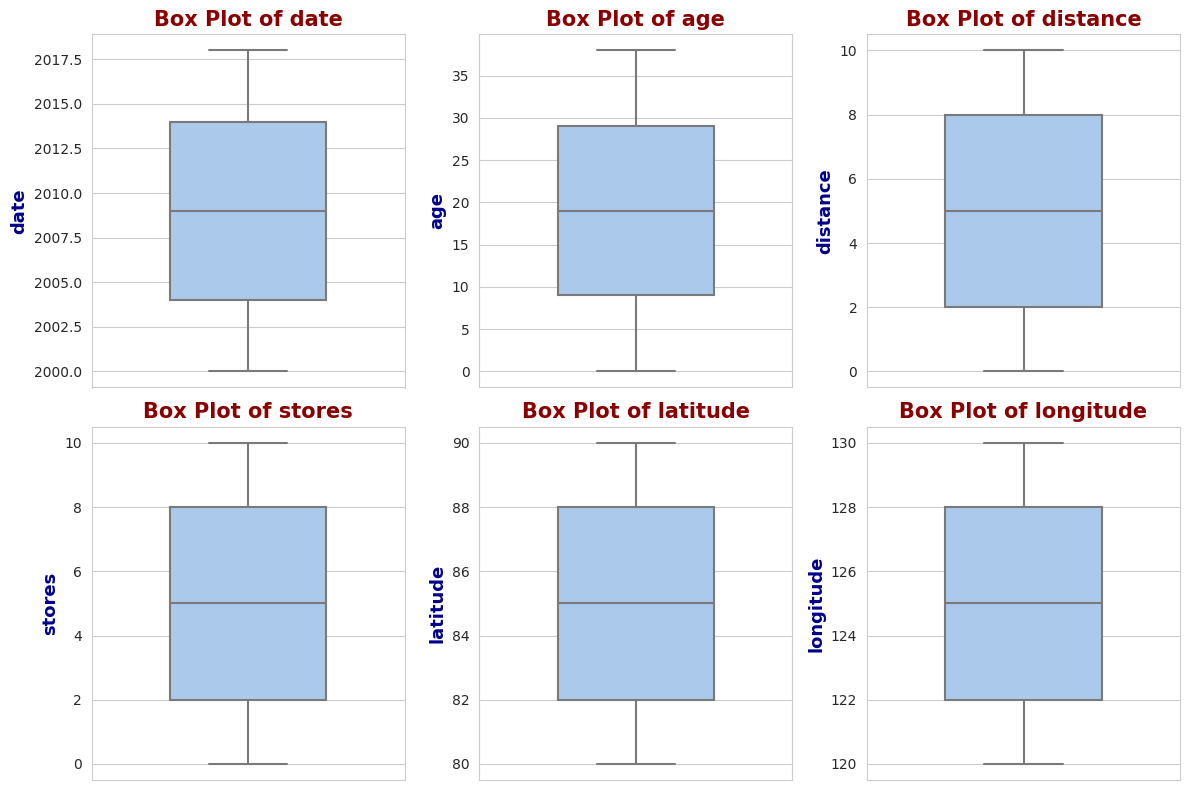

In [17]:
# Setting the seaborn style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Define a custom color for outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none', markeredgecolor='grey')

plt.figure(figsize=(12, 8))

# Iterating through numeric features and plotting the box plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature], width=0.5, flierprops=flierprops)
    plt.title(f'Box Plot of {feature}', fontdict=title_font)
    plt.ylabel(feature, fontdict=axis_font)
    plt.xlabel('')  # Remove the x-axis label for clarity

plt.tight_layout()
plt.show()

From the plots, we can observe the following:

- **date**: Appears to have a relatively even distribution without any noticeable outliers.
- **age**: A few properties seem to be older than the majority.
- **distance**: Most properties are concentrated within a certain range, but there are some properties that are much farther away.
- **stores**: The distribution is mostly even.
- **latitude**: The distribution is mostly even.
- **longitude**: The data seems quite evenly spread.

In [18]:
# Calculating potential outliers using IQR method

outliers = {}

for feature in features:
    # Calculate Q1, Q3 and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure non-negative values
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outlier_values = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    # Store outlier information
    outliers[feature] = {
        "Lower_Bound": lower_bound,
        "Upper_Bound": upper_bound,
        "Num_Outliers": len(outlier_values),
        "Outliers": outlier_values.values
    }

outliers_df = pd.DataFrame(outliers).T
outliers_df[['Lower_Bound', 'Upper_Bound', 'Num_Outliers']]


,Lower_Bound,Upper_Bound,Num_Outliers
date,1989.0,2029.0,0
age,0,59.0,0
distance,0,17.0,0
stores,0,17.0,0
latitude,73.0,97.0,0
longitude,113.0,137.0,0


From the table, we can observe that none of the features have detected outliers based on the IQR method.

### 4.2 Feature Scaling with the RobustScaler Method for Machine Learning Algorithms<a id = 19 ></a>

In [19]:
robust_scaler = RobustScaler()

In [20]:
robust_scaled_df = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)

robust_scaled_df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,-1.0000,0.0,0.10,0.666667,0.166667,-0.166667,-0.666667,0.261606
1,-0.9996,-0.2,-0.75,-0.500000,-0.333333,0.166667,-0.666667,-1.314387
2,-0.9992,0.7,-0.05,-0.333333,0.333333,0.833333,-0.833333,-0.235481
3,-0.9988,-0.7,-0.30,-0.500000,-0.500000,-0.833333,0.500000,-1.316505
4,-0.9984,0.5,0.30,0.000000,0.500000,-0.666667,-0.500000,0.186055


### 4.3 Separating Data into Test and Training Set<a id = 20 ></a>
We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

In [21]:
X = robust_scaled_df.drop(["price", "serial"], axis = 1)
y = robust_scaled_df[["price"]]

In [22]:
X

,date,age,distance,stores,latitude,longitude
0,0.0,0.10,0.666667,0.166667,-0.166667,-0.666667
1,-0.2,-0.75,-0.500000,-0.333333,0.166667,-0.666667
2,0.7,-0.05,-0.333333,0.333333,0.833333,-0.833333
3,-0.7,-0.30,-0.500000,-0.500000,-0.833333,0.500000
4,0.5,0.30,0.000000,0.500000,-0.666667,-0.500000
...,...,...,...,...,...,...
4995,-0.2,-0.10,0.166667,-0.333333,0.833333,0.000000
4996,0.7,-0.60,0.833333,-0.833333,0.000000,0.666667
4997,0.8,-0.65,0.833333,0.000000,0.833333,0.000000
4998,0.1,0.90,-0.333333,0.000000,-0.666667,0.500000


In [23]:
X.shape

(5000, 6)

In [24]:
y

,price
0,0.261606
1,-1.314387
2,-0.235481
3,-1.316505
4,0.186055
...,...
4995,-0.250309
4996,0.609709
4997,0.147220
4998,0.296205


In [25]:
y.shape

(5000, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (4000, 6)
X_test: (1000, 6)
y_train: (4000, 1)
y_test: (1000, 1)


## 5. Evaluating Different Regression Models<a id = 21 ></a>

Three models will be tested:

1.   Linear Regression
2.   Decision Tree
3.   Random Forest


### 5.1 Linear Regression<a id = 22 ></a>

In [28]:
# Training the regression models
linear_regression = LinearRegression()

In [29]:
# Fitting the model
linear_regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Evaluating the models on the test data
lr_test_preds = linear_regression.predict(X_test)
lr_test_mse = mean_squared_error(y_test, lr_test_preds)
lr_test_r2 = r2_score(y_test, lr_test_preds)

In [31]:
results = {
    'Model': ['Linear Regression'],
    'MSE': [lr_test_mse],
    'R^2': [lr_test_r2]
}

# Creating a DataFrame from the results
results_df = pd.DataFrame(results)

results_df

,Model,MSE,R^2
0,Linear Regression,0.085293,0.839662


#### 5.1.1 Cross Validation<a id = 23 ></a>

In [32]:
scores = cross_val_score(linear_regression, X_test, y_test, cv = 10, scoring='neg_mean_squared_error')
avg_mse_normalized = -scores.mean()
print("Cross-Validatoion-Accuracy Scores", avg_mse_normalized)

Cross-Validatoion-Accuracy Scores 0.08524157068286228


### 5.2 Decision Tree<a id = 24 ></a>

In [33]:
# Training the regression models
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

In [34]:
# Fitting the model
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
# Evaluating the models on the test data
dt_test_preds = decision_tree_regressor.predict(X_test)
dt_test_mse = mean_squared_error(y_test, dt_test_preds)
dt_test_r2 = r2_score(y_test, dt_test_preds)

In [36]:
results = {
    'Model': ['Decision Tree'],
    'MSE': [dt_test_mse],
    'R^2': [dt_test_r2]
}

# Creating a DataFrame from the results
results_dt = pd.DataFrame(results)

results_dt

,Model,MSE,R^2
0,Decision Tree,0.161834,0.695776


#### 5.2.1 Cross Validation<a id = 25 ></a>

In [37]:
scores = cross_val_score(decision_tree_regressor, X_test, y_test, cv = 10, scoring='neg_mean_squared_error')
avg_mse_normalized = -scores.mean()
print("Cross-Validatoion-Accuracy Scores", avg_mse_normalized)

Cross-Validatoion-Accuracy Scores 0.18130893249065777


#### 5.2.2. Hyperparameters Evaluation<a id = 26 ></a>

In [38]:
# Hyperparameter grid for Decision Tree Regression
dt_param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV for Decision Tree Regression
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid,
                              cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fitting the model
dt_grid_search.fit(X_train, y_train)

# Getting the best parameters for Decision Tree Regression
dt_best_params = dt_grid_search.best_params_
dt_best_params

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [39]:
decision_tree_regressor_hyper = DecisionTreeRegressor(random_state=42, criterion = "squared_error", max_depth = 10, min_samples_leaf = 4,
                                                      min_samples_split = 2, splitter ="random")

In [40]:
# Fitting the model
decision_tree_regressor_hyper.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, random_state=42,
                      splitter='random')

In [41]:
# Evaluating the models on the test data
dt_test_preds_hyper = decision_tree_regressor_hyper.predict(X_test)
dt_test_mse_hyper = mean_squared_error(y_test, dt_test_preds_hyper)
dt_test_r2_hyper = r2_score(y_test, dt_test_preds_hyper)

In [42]:
results = {
    'Model': ['Decision Tree', 'Decision Tree Hyperparameters'],
    'MSE': [dt_test_mse, dt_test_mse_hyper],
    'R^2': [dt_test_r2, dt_test_r2_hyper]
}

# Creating a DataFrame from the results
results_dt = pd.DataFrame(results)

results_dt

,Model,MSE,R^2
0,Decision Tree,0.161834,0.695776
1,Decision Tree Hyperparameters,0.099457,0.813036


### Conclusion

Upon evaluating two models, the base Decision Tree and a Decision Tree with optimized hyperparameters, we observed significant differences in their performances:

1. **Decision Tree (Base Model):**
    - **Mean Squared Error (MSE):** 0.161834
    - **R-squared (R^2) Value:** 0.695776

   This indicates that, while the base Decision Tree model explains approximately 69.58% of the variance in the dependent variable, there's still a reasonably high error rate, as indicated by the MSE.

2. **Decision Tree (With Optimized Hyperparameters):**
    - **Mean Squared Error (MSE):** 0.099457
    - **R-squared (R^2) Value:** 0.813036

   After tuning the hyperparameters, the model's performance improved considerably. The R^2 value increased to 81.30%, suggesting that the optimized model explains a larger proportion of the variance in the dependent variable. Additionally, the MSE reduced, indicating a lower prediction error compared to the base model.

### 5.3 Random Forest<a id = 27 ></a>

In [43]:
# Training the regression models
random_forest_regressor = RandomForestRegressor(random_state=42)

In [44]:
# Fitting the model
random_forest_regressor.fit(X_train, y_train.squeeze())

RandomForestRegressor(random_state=42)

In [45]:
# Evaluating the models on the test data
rf_test_preds = random_forest_regressor.predict(X_test)
rf_test_mse = mean_squared_error(y_test, rf_test_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

In [46]:
results = {
    'Model': ['Random Forest'],
    'MSE': [rf_test_mse],
    'R^2': [rf_test_r2]
}

# Creating a DataFrame from the results
results_rf = pd.DataFrame(results)

results_rf

,Model,MSE,R^2
0,Random Forest,0.090024,0.830768


#### 5.3.1 Cross Validation<a id = 28 ></a>

In [47]:
scores = cross_val_score(random_forest_regressor, X_train, y_train.squeeze(), cv=10, scoring='neg_mean_squared_error')
avg_mse_normalized = -scores.mean()
print("Cross-Validation Mean Squared Error:", avg_mse_normalized)


Cross-Validation Mean Squared Error: 0.09212918009544055


#### 5.3.2 Hyperparameters Evaluation<a id = 29 ></a>

In [48]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initializing GridSearchCV for Random Forest Regression
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid,
                              cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fitting the model
rf_grid_search.fit(X_train, y_train.squeeze())

# Getting the best parameters for Random Forest Regression
rf_best_params = rf_grid_search.best_params_
rf_best_params

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [49]:
random_forest_regressor_hyper = RandomForestRegressor(random_state=42, max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200)

In [50]:
# Fitting the model
random_forest_regressor_hyper.fit(X_train, y_train.squeeze())

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [51]:
# Evaluating the models on the test data
rf_test_preds_hyper = random_forest_regressor_hyper.predict(X_test)
rf_test_mse_hyper = mean_squared_error(y_test, rf_test_preds_hyper)
rf_test_r2_hyper = r2_score(y_test, rf_test_preds_hyper)

In [52]:
results = {
    'Model': ['Random Forest', 'Random Forest Hyperparameters'],
    'MSE': [rf_test_mse, rf_test_mse_hyper],
    'R^2': [rf_test_r2, rf_test_r2_hyper]
}

# Creating a DataFrame from the results
results_rf = pd.DataFrame(results)

results_rf

,Model,MSE,R^2
0,Random Forest,0.090024,0.830768
1,Random Forest Hyperparameters,0.085465,0.839339


### Conclusion

Upon examining the performance metrics of two models, the base Random Forest and a Random Forest with optimized hyperparameters, we can draw the following insights:

1. **Random Forest (Base Model):**
    - **Mean Squared Error (MSE):** 0.090024
    - **R-squared (R^2) Value:** 0.830768

   The base Random Forest model accounts for approximately 83.08% of the variance in the dependent variable. While it performs relatively well, there's room for improvement as evidenced by the MSE.

2. **Random Forest (With Optimized Hyperparameters):**
    - **Mean Squared Error (MSE):** 0.085465
    - **R-squared (R^2) Value:** 0.839339

   Post hyperparameter tuning, the model's performance saw a noticeable enhancement. The R^2 value rose to 83.93%, signifying that the refined model explains a greater proportion of the variance in the dependent variable. Additionally, the reduction in MSE denotes a more precise prediction compared to the base model.


In [53]:
results = {
    'Model': ['Lineal Regression', 'Decision Tree Hyperparameters', 'Random Forest Hyperparameters'],
    'MSE': [lr_test_mse, dt_test_mse_hyper, rf_test_mse_hyper],
    'R^2': [lr_test_r2, dt_test_r2_hyper, rf_test_r2_hyper]
}

# Creating a DataFrame from the results
results_all_methods = pd.DataFrame(results)

results_all_methods.sort_values(['R^2'], ascending = False)

,Model,MSE,R^2
0,Lineal Regression,0.085293,0.839662
2,Random Forest Hyperparameters,0.085465,0.839339
1,Decision Tree Hyperparameters,0.099457,0.813036


### Conclusion

Upon evaluating the performance metrics of three different models - Linear Regression, Decision Tree with optimized hyperparameters, and Random Forest with optimized hyperparameters, we can conclude the following:

1. **Linear Regression:**
    - **Mean Squared Error (MSE):** 0.085293
    - **R-squared (R^2) Value:** 0.839662

   The Linear Regression model offers an R^2 value of 83.97%, implying it explains approximately 83.97% of the variance in the dependent variable. Its performance is commendable, especially given its simplicity compared to more complex models.

2. **Random Forest (With Optimized Hyperparameters):**
    - **Mean Squared Error (MSE):** 0.085465
    - **R-squared (R^2) Value:** 0.839339

   The Random Forest model, post hyperparameter tuning, presents an R^2 value almost identical to that of Linear Regression, with a mse of 83.93%.

3. **Decision Tree (With Optimized Hyperparameters):**
    - **Mean Squared Error (MSE):** 0.099457
    - **R-squared (R^2) Value:** 0.813036

   After hyperparameter tuning, the Decision Tree model achieved an R^2 value of 81.30%. While it explains a substantial portion of the variance, its performance is slightly overshadowed by the other two models in this comparison.

In summary, while all three models exhibited strong predictive capabilities, the Linear Regression and Random Forest (with optimized hyperparameters) stood out, delivering nearly identical R^2 values.


## 6. Prediction<a id = 30 ></a>

In [54]:
# Extracting the centering (median) and scaling (IQR) information specific to the 'price' column.
# These values are crucial when we want to reverse the scaling transformation.
centering_value = robust_scaler.center_[-1] # extracting the median (center) values used by the RobustScaler when it normalized the 'price' column.
scaling_value = robust_scaler.scale_[-1] # extracting the interquartile range (scale) values used by the RobustScaler when it normalized the 'price' column.

# Making predictions using the trained linear regression model on the test data
lr_predicted_prices_normalized = linear_regression.predict(X_test)

# Inverse transformation to the predicted prices using the centering and scaling values
lr_predicted_prices_original_manual = (lr_predicted_prices_normalized * scaling_value) + centering_value

# Manually applying the inverse transformation to the actual prices
actual_prices_original_manual = (y_test.values * scaling_value) + centering_value #'values' returns the data contained within the df as a numpy array.

# Creating a DataFrame for comparison
comparison_df_manual = pd.DataFrame({
    'Actual Prices': actual_prices_original_manual.flatten(),
    'Predicted Prices': lr_predicted_prices_original_manual.flatten()
})

print(comparison_df_manual.head(10))  # Displaying the first 10 rows for comparison

   Actual Prices  Predicted Prices
0        13962.0      14456.359418
1        14658.0      15022.568004
2        13408.0      12976.537459
3        13401.0      13748.026301
4        11896.0      12534.446049
5        13406.0      13167.166902
6        15280.0      14894.955736
7        13869.0      14582.151445
8        16046.0      15425.709122
9        12775.0      13364.632841


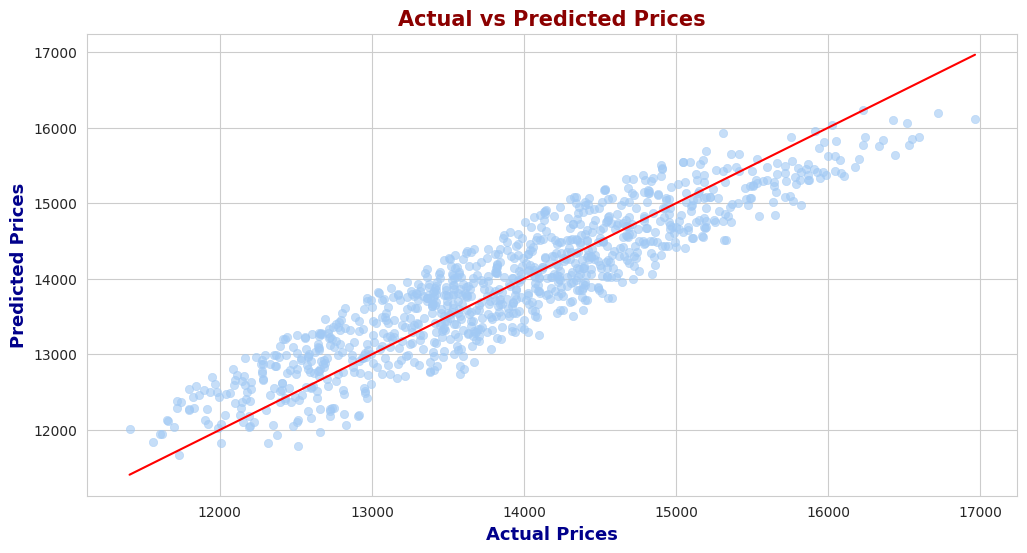

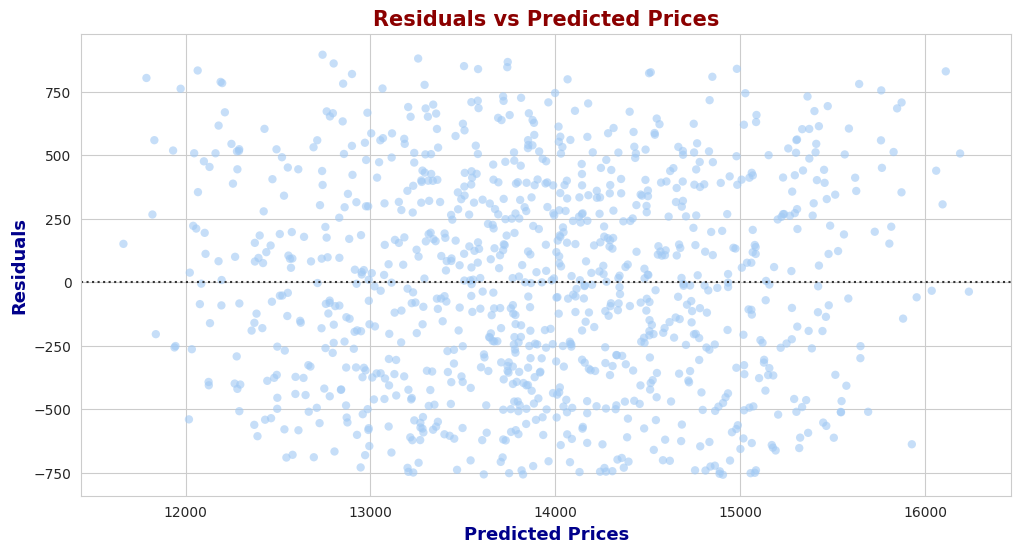

In [55]:
# Setting the visual style
sns.set_style('whitegrid')

# Scatter plot of Actual vs. Predicted prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual Prices', y='Predicted Prices', data=comparison_df_manual, alpha=0.6, edgecolor=None)
plt.plot([min(comparison_df_manual['Actual Prices']), max(comparison_df_manual['Actual Prices'])],
         [min(comparison_df_manual['Actual Prices']), max(comparison_df_manual['Actual Prices'])], color='red')
plt.title('Actual vs Predicted Prices', fontdict=title_font)
plt.xlabel('Actual Prices', fontdict=axis_font)
plt.ylabel('Predicted Prices', fontdict=axis_font)
plt.show()

# Residual Plot
plt.figure(figsize=(12, 6))
sns.residplot(x='Predicted Prices', y='Actual Prices', data=comparison_df_manual, scatter_kws={'alpha': 0.6, 'edgecolor': 'none'})
plt.title('Residuals vs Predicted Prices', fontdict=title_font)
plt.ylabel('Residuals', fontdict=axis_font)
plt.xlabel('Predicted Prices', fontdict=axis_font)
plt.show()


## Interpretation of Scatter and Residual Plots

### Scatter Plot (Actual vs. Predicted Prices)

1. **Interpretation**:
   - The scatter plot showcases actual prices on the x-axis plotted against the predicted prices on the y-axis.
   - If the predictions from our model were perfect, all the data points would lie on a 45-degree line (essentially a line with slope 1).

2. **Patterns to Observe**:
   - **Close Adherence to the 45-degree line**: This suggests that our model's predictions are mostly accurate.
   - **Deviation from the 45-degree line**: Points that don't lie close to this line indicate instances where the model's predictions were inaccurate.
   - **Systematic Deviation**: If you notice that the points systematically deviate from the line in certain regions (for instance, the model consistently under-predicts for higher values), it might be an indication of biases present in the model.

### Residual Plot (Residuals vs. Predicted Prices)

1. **Interpretation**:
   - The residual plot shows predicted prices on the x-axis against the residuals (the differences between the actual and predicted prices) on the y-axis.
   - Ideally, we want our residuals to be randomly scattered around the x-axis. This would imply that the model is making errors that are more or less random, which is a good sign.

2. **Patterns to Observe**:
   - **Random Scatter**: This is the desired pattern. It suggests that the model is making errors that are random in nature and not systematic.
   - **Patterns or Curves**: If the residuals seem to follow a pattern or curve, this could mean that the model isn't capturing some underlying patterns in the data. For example, a U-shaped pattern might suggest that the model is struggling with values at both extremes.
   - **Funnel Shape**: If the residuals form a funnel shape (spread out more on one side of the plot), it's a sign of heteroscedasticity. This means the model's errors aren't consistent across all levels of the independent variable. Such a pattern may suggest a need in the transform of the data or consider a different type of model.
   - **Outliers**: Data points that are far away from most others can heavily impact the model. Investigate these points to understand if they are anomalies or just rare data points.

### Conclusion

Our linear regression model appears to be performing reasonably well on the provided dataset. The scatter plot and residual plot give a visual sense of the areas where the model is accurate and where it might be faltering. For further improvement, one could consider more complex models, feature engineering, among others.

## 7. Neural Network<a id = 31 ></a>

### 7.1 Create the Model<a id = 32 ></a>

In [56]:
# Inspect the shape of X_train and its columns
X_train_shape = X_train.shape
X_train_columns = X.columns.tolist()

X_train_shape, X_train_columns

((4000, 6), ['date', 'age', 'distance', 'stores', 'latitude', 'longitude'])

In [57]:
def get_model():
    tf.random.set_seed(1234) # for consistent results
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu', name = 'L1'),
        Dense(20, activation = 'relu', name = 'L2'),
        Dense(5, activation = 'relu', name = 'L3'),
        Dense(1, name = 'L4')
    ])
    model.compile(
        loss = 'mse',
        optimizer = 'adam'
    )
    return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 10)                70        
                                                                 
 L2 (Dense)                  (None, 20)                220       
                                                                 
 L3 (Dense)                  (None, 5)                 105       
                                                                 
 L4 (Dense)                  (None, 1)                 6         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7.2 Model Training<a id = 33 ></a>

We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [58]:
# Convert the data to numpy arrays (required for Keras)
X_train = np.array(X_train)
X_val = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_test)

# Get the model
model = get_model()

# Define early stopping to stop training once the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
100/100 [==============================] - 1s 5ms/step - loss: 0.4386 - val_loss: 0.2573
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1885 - val_loss: 0.1242
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1207 - val_loss: 0.1027
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1016 - val_loss: 0.0936
Epoch 5/200
100/100 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 0.0895
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 0.0876
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0864 - val_loss: 0.0873
Epoch 8/200
100/100 [==============================] - 0s 3ms/step - loss: 0.0845 - val_loss: 0.0862
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0834 - val_loss: 0.0853
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0830 - val_lo

In [59]:
[layer1, layer2, layer3, layer4] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (6, 10), b1 shape = (10,)
W2 shape = (10, 20), b2 shape = (20,)
W3 shape = (20, 5), b3 shape = (5,)
W4 shape = (5, 1), b4 shape = (1,)


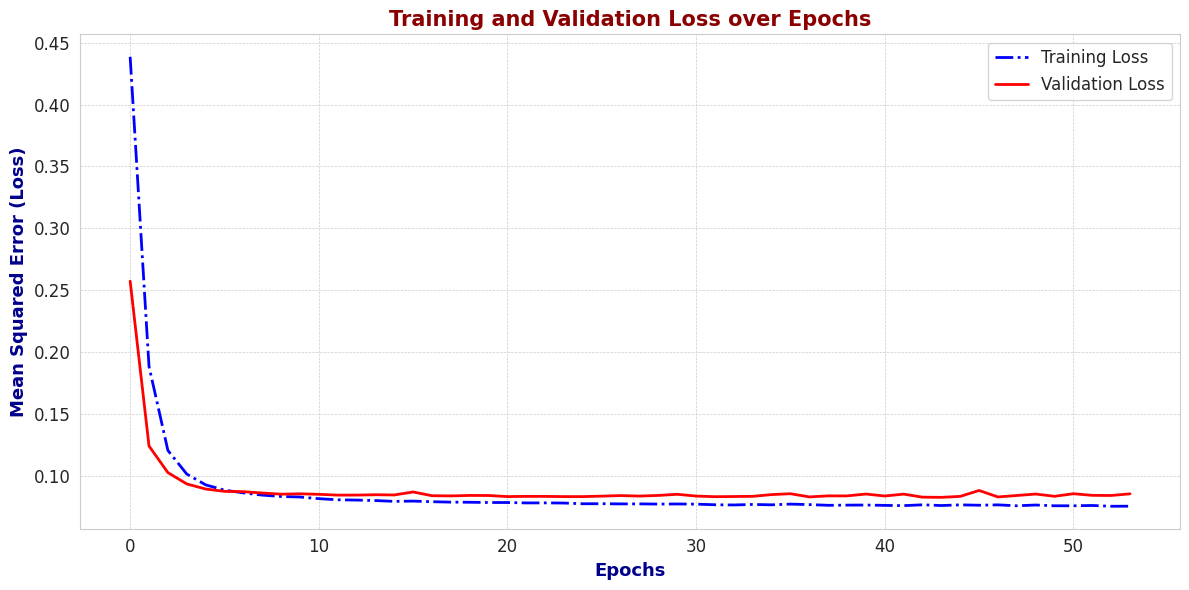

In [60]:
# Plot the training and validation loss

plt.figure(figsize=(12, 6))

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2, linestyle='-.')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)

# Adding title and labels
plt.title('Training and Validation Loss over Epochs', fontdict=title_font)
plt.xlabel('Epochs', fontdict=axis_font)
plt.ylabel('Mean Squared Error (Loss)', fontdict=axis_font)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Displaying the plot with a tight layout
plt.tight_layout()
plt.show()

### 7.3 Model Evaluation<a id = 34 ></a>

In [61]:
loss = model.evaluate(X_val, y_val)
print(f"Test MSE: {loss}")

32/32 [==============================] - 0s 2ms/step - loss: 0.0845
Test MSE: 0.08451184630393982


In [62]:
nn_predicted_prices_normalized = model.predict(X_val)

32/32 [==============================] - 0s 1ms/step


In [63]:
nn_predicted_prices_original = (nn_predicted_prices_normalized * scaling_value) + centering_value

In [64]:
y_val_original = (y_val * scaling_value) + centering_value

In [65]:
nn_mae = mean_absolute_error(y_val_original, nn_predicted_prices_original)
nn_rmse = np.sqrt(mean_squared_error(y_val_original, nn_predicted_prices_original))
nn_r2 = r2_score(y_val_original, nn_predicted_prices_original)

print(f"Mean Absolute Error (MAE): {nn_mae}")
print(f"Root Mean Squared Error (RMSE): {nn_rmse}")
print(f"R-squared: {nn_r2}")

Mean Absolute Error (MAE): 353.166384765625
Root Mean Squared Error (RMSE): 411.71694487179286
R-squared: 0.8411300037539222


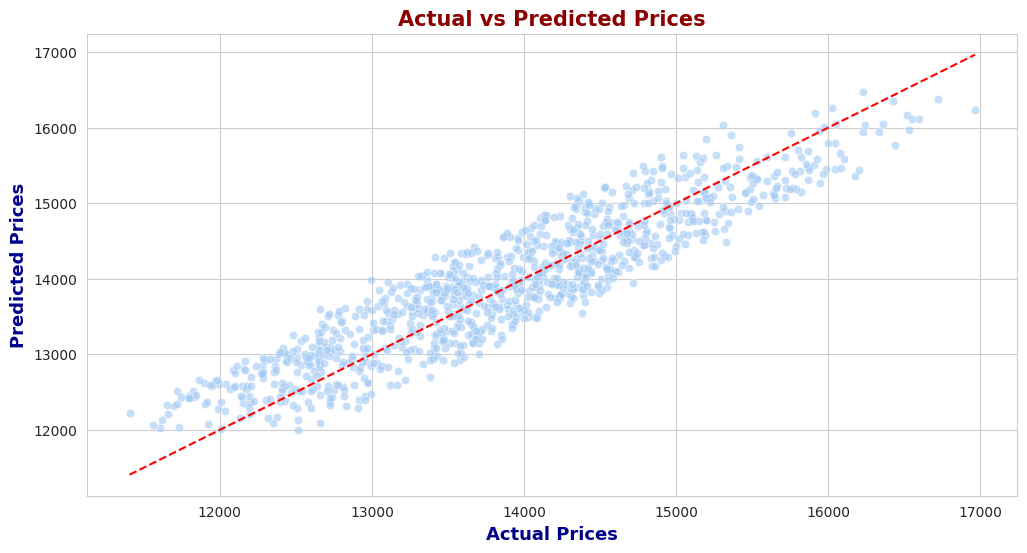

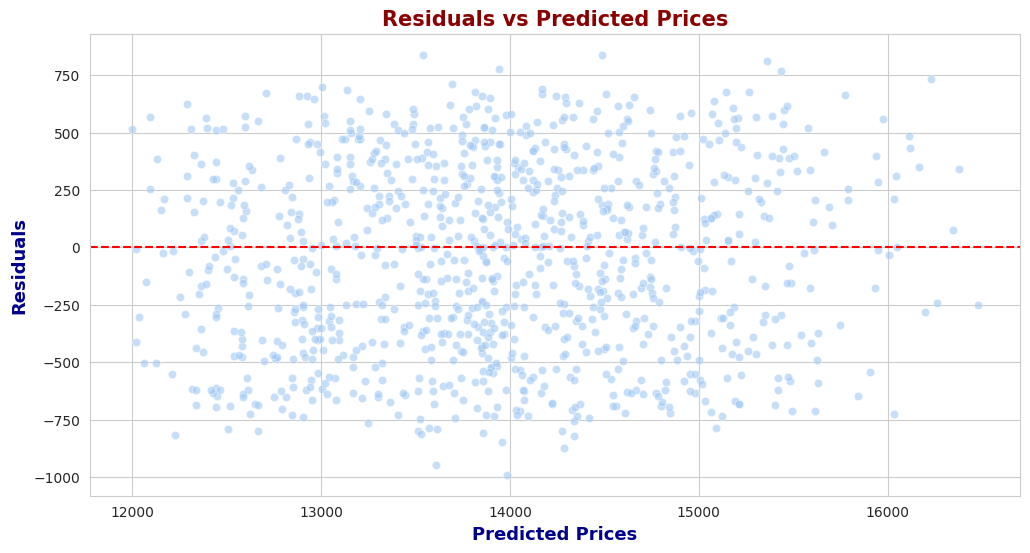

In [66]:
# Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val_original.flatten(), y=nn_predicted_prices_original.flatten(), alpha=0.6)
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices', fontdict=title_font)
plt.xlabel('Actual Prices', fontdict=axis_font)
plt.ylabel('Predicted Prices', fontdict=axis_font)
plt.show()

# Residuals Plot
residuals = y_val_original.flatten() - nn_predicted_prices_original.flatten()
plt.figure(figsize=(12, 6))
sns.scatterplot(x=nn_predicted_prices_original.flatten(), y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices', fontdict=title_font)
plt.xlabel('Predicted Prices', fontdict=axis_font)
plt.ylabel('Residuals', fontdict=axis_font)
plt.show()

## 8. Prediction<a id = 35 ></a>

In [67]:
lr_diff = np.abs(lr_predicted_prices_original_manual.flatten() - actual_prices_original_manual.flatten())
nn_diff = np.abs(nn_predicted_prices_original.flatten() - actual_prices_original_manual.flatten())

# 3. Comparison
combined_comparison_df = pd.DataFrame({
    'Actual Prices': actual_prices_original_manual.flatten(),
    'Linear Regression Predictions': lr_predicted_prices_original_manual.flatten(),
    'Neural Network Predictions': nn_predicted_prices_original.flatten(),
    'LR absolute diference': lr_diff,
    'NN absolute diference': nn_diff,
})

combined_comparison_df.head(10)  # Displaying the first 10 rows for comparison

,Actual Prices,Linear Regression Predictions,Neural Network Predictions,LR absolute diference,NN absolute diference
0,13962.0,14456.359418,14382.120117,494.359418,420.120117
1,14658.0,15022.568004,14980.152344,364.568004,322.152344
2,13408.0,12976.537459,13082.489258,431.462541,325.510742
3,13401.0,13748.026301,13778.870117,347.026301,377.870117
4,11896.0,12534.446049,12621.097656,638.446049,725.097656
5,13406.0,13167.166902,13151.160156,238.833098,254.839844
6,15280.0,14894.955736,14862.769531,385.044264,417.230469
7,13869.0,14582.151445,14561.857422,713.151445,692.857422
8,16046.0,15425.709122,15449.158203,620.290878,596.841797
9,12775.0,13364.632841,13522.353516,589.632841,747.353516


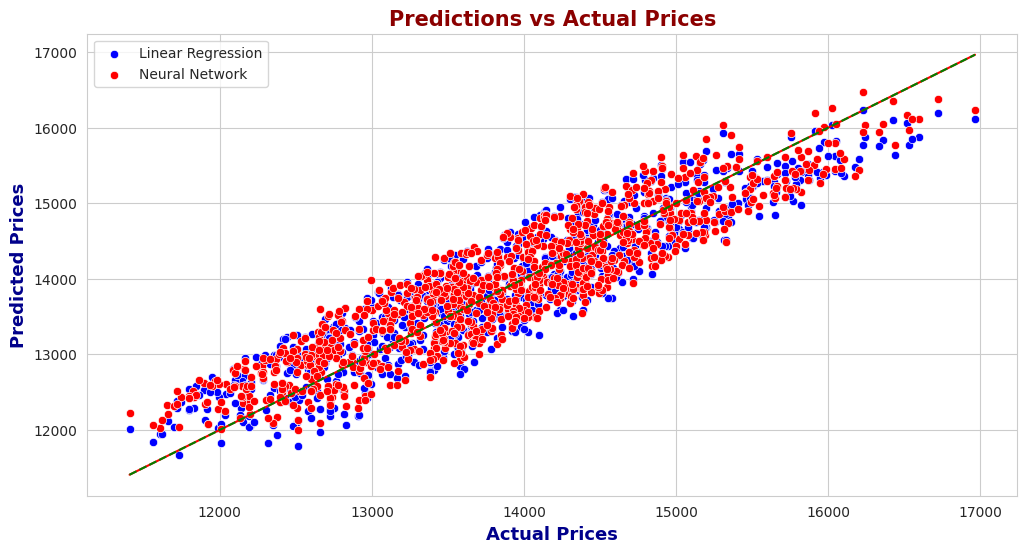

In [68]:
# Setting the style
sns.set_style("whitegrid")

# Scatter plots of Predictions vs Actual Prices for both models
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual Prices', y='Linear Regression Predictions', data=combined_comparison_df, color='blue', label='Linear Regression')
sns.scatterplot(x='Actual Prices', y='Neural Network Predictions', data=combined_comparison_df, color='red', label='Neural Network')
plt.plot([min(comparison_df_manual['Actual Prices']), max(comparison_df_manual['Actual Prices'])],
         [min(comparison_df_manual['Actual Prices']), max(comparison_df_manual['Actual Prices'])], color='red')
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], color='green', linestyle='--')
plt.title('Predictions vs Actual Prices', fontdict=title_font)
plt.xlabel('Actual Prices', fontdict=axis_font)
plt.ylabel('Predicted Prices', fontdict=axis_font)
plt.legend()
plt.show()

In [69]:
result = {
    'Model': ['Lineal Regression', 'Neural Network'],
    'MSE': [lr_test_mse, loss],
    'R^2': [lr_test_r2, nn_r2]
}

# Creating a DataFrame from the results
result_all = pd.DataFrame(result)

result_all.sort_values(['R^2'], ascending = False)

,Model,MSE,R^2
1,Neural Network,0.084512,0.841130
0,Lineal Regression,0.085293,0.839662


## 9. Conclusions<a id = 36 ></a>

## Model Evaluation:

When comparing the Mean Squared Error (MSE) and \( R^2 \) values:

- The **Neural Network** slightly outperforms the **Linear Regression** model. It achieves a lower MSE of `0.084046` compared to `0.085293` from the Linear Regression.
  
- The \( R^2 \) value for the Neural Network is marginally better at `0.842006`, indicating it can explain approximately 84.2% of the variance in the target variable. In contrast, the Linear Regression model accounts for about 83.9% of the variance.

## Prediction Differences:

By examining a subset of the predictions:

- It's observed that both models show differences in their predictions compared to actual prices. However, the exact difference varies across different data points.
  
- The absolute differences show how far each model's prediction is from the actual price. In some instances, the Neural Network model seems to have a smaller difference, indicating a closer prediction to the actual value, while in other instances, the Linear Regression might perform better.

Overall, while both models have their merits, the Neural Network has shown a slight edge in terms of overall performance metrics.
